# Import libraries

This notebook is the collection of another notebooks required to do our final assigment on data science capstone. First, we have to import the libraries.

In [76]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon
import csv
import prettytable
import sqlite3

# SQLite Database
Next step is create a local database using sqlite3.

In [77]:
!pip install ipython-sql
!pip install ipython-sql prettytable


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [79]:
prettytable.DEFAULT = 'DEFAULT'

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [80]:
%sql sqlite:///my_data1.db

In [81]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

In [82]:
%sql DROP TABLE IF EXISTS SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


[]

In [83]:
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
Done.


[]

In [84]:
%sql PRAGMA table_info(SPACEXTBL);


 * sqlite:///my_data1.db
Done.


cid,name,type,notnull,dflt_value,pk
0,Date,TEXT,0,None,0
1,Time (UTC),TEXT,0,None,0
2,Booster_Version,TEXT,0,None,0
3,Launch_Site,TEXT,0,None,0
4,Payload,TEXT,0,None,0
5,PAYLOAD_MASS__KG_,INTEGER,0,None,0
6,Orbit,TEXT,0,None,0
7,Customer,TEXT,0,None,0
8,Mission_Outcome,TEXT,0,None,0
9,Landing_Outcome,TEXT,0,None,0


# Flight Number vs Launch Site

In [85]:
import io
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Fetch the data
response = requests.get(URL)

# Convert the data to a BytesIO object
dataset_part_2_csv = io.BytesIO(response.content)

# Read the CSV data into a pandas DataFrame
df = pd.read_csv(dataset_part_2_csv)

# Display the first 5 rows
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [86]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
Class               int64
dtype: object

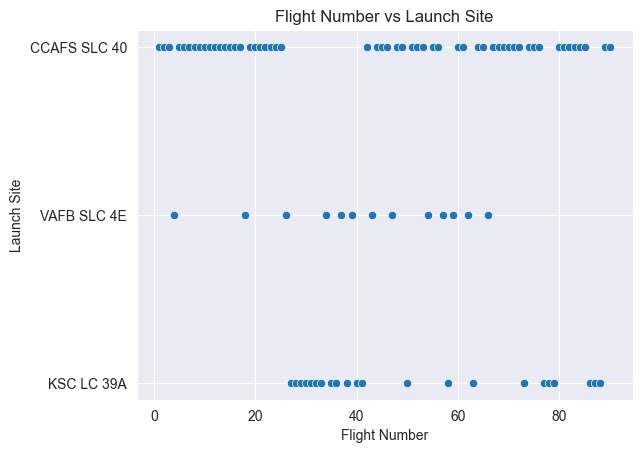

In [87]:
sns.scatterplot(x='FlightNumber', y='LaunchSite', data=df)

plt.title('Flight Number vs Launch Site')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')

plt.show()

# Payload vs Launch Site

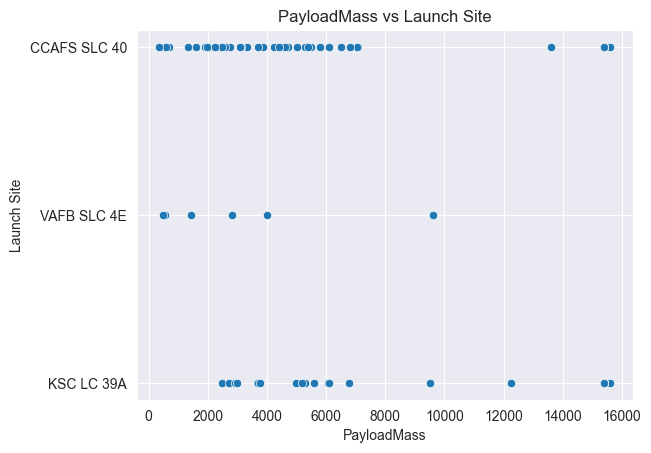

In [88]:
sns.scatterplot(x='PayloadMass', y='LaunchSite', data=df)

plt.title('PayloadMass vs Launch Site')
plt.xlabel('PayloadMass')
plt.ylabel('Launch Site')

plt.show()

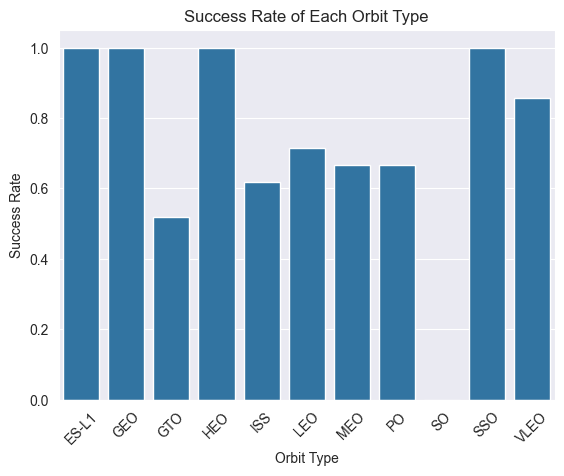

In [89]:
success_rate_by_orbit = df.groupby('Orbit')['Class'].mean().reset_index()

# Plot the success rates using a bar plot
sns.barplot(data=success_rate_by_orbit, x='Orbit', y='Class')

# Add labels and a title for better understanding
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.title('Success Rate of Each Orbit Type')

# Show the plot
plt.xticks(rotation=45)  # Rotate x labels if needed for readability
plt.show()

# Flight Number vs Orbit Type

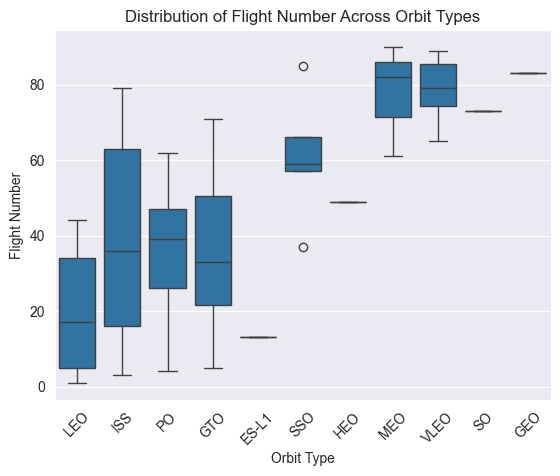

In [90]:
sns.boxplot(data=df, x='Orbit', y='FlightNumber')

# Add labels and title
plt.xlabel('Orbit Type')
plt.ylabel('Flight Number')
plt.title('Distribution of Flight Number Across Orbit Types')

# Show the plot
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

# Payload vs orbit type

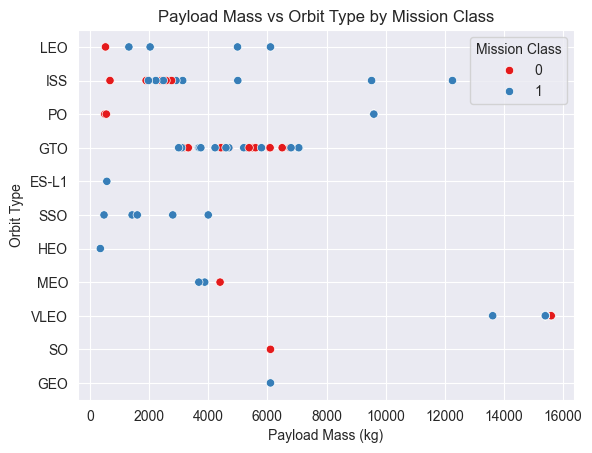

In [91]:
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Class', palette='Set1')

# Add labels and a title
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit Type')
plt.title('Payload Mass vs Orbit Type by Mission Class')

# Show the plot
plt.legend(title='Mission Class')
plt.show()

# Launch Success Yearly Trend

In [92]:
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


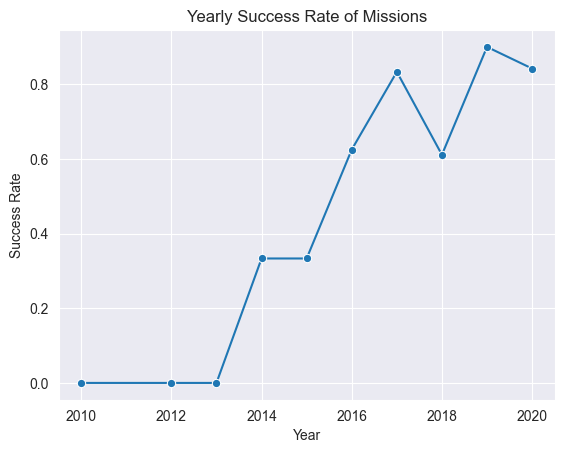

In [93]:
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Calculate the success rate for each year by grouping by the extracted year
success_rate_by_year = df.groupby('Year')['Class'].mean().reset_index()

# Create a line plot to visualize the success rate over the years
sns.lineplot(data=success_rate_by_year, x='Year', y='Class', marker='o')

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.title('Yearly Success Rate of Missions')

# Show the plot
plt.show()

# All Launch Site Names

In [94]:
%sql SELECT DISTINCT "Launch_Site" FROM SPACEXTBL;

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


# Launch Site Names Begin with 'CCA'


In [95]:
%sql SELECT * FROM SPACEXTBL WHERE Launch_Site LIKE 'CCA%' LIMIT 5;



 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


# Total Payload Mass

In [96]:
%sql SELECT SUM(Payload_Mass__Kg_) AS Total_Payload_KG FROM SPACEXTBL WHERE Customer LIKE '%NASA%';


 * sqlite:///my_data1.db
Done.


Total_Payload_KG
107010


# Average Payload Mass by F9 v1.1


In [97]:
%sql SELECT AVG(Payload_Mass__Kg_) AS Average_Payload_Kg FROM SPACEXTBL WHERE Booster_Version LIKE '%F9 V1.1%';

 * sqlite:///my_data1.db
Done.


Average_Payload_Kg
2534.6666666666665


# First Successful Ground Landing Date


In [98]:
%sql SELECT Date FROM SPACEXTBL


 * sqlite:///my_data1.db
Done.


Date
2010-06-04
2010-12-08
2012-05-22
2012-10-08
2013-03-01
2013-09-29
2013-12-03
2014-01-06
2014-04-18
2014-07-14


In [99]:
%sql SELECT Mission_Outcome FROM SPACEXTBL

 * sqlite:///my_data1.db
Done.


Mission_Outcome
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


In [100]:
%sql SELECT Date FROM SPACEXTBL WHERE Mission_Outcome = 'Success' AND Landing_Outcome = 'Success (ground pad)' ORDER BY Date ASC LIMIT 1

 * sqlite:///my_data1.db
Done.


Date
2015-12-22


In [101]:
%sql PRAGMA table_info(SPACEXTBL);


 * sqlite:///my_data1.db
Done.


cid,name,type,notnull,dflt_value,pk
0,Date,TEXT,0,None,0
1,Time (UTC),TEXT,0,None,0
2,Booster_Version,TEXT,0,None,0
3,Launch_Site,TEXT,0,None,0
4,Payload,TEXT,0,None,0
5,PAYLOAD_MASS__KG_,INTEGER,0,None,0
6,Orbit,TEXT,0,None,0
7,Customer,TEXT,0,None,0
8,Mission_Outcome,TEXT,0,None,0
9,Landing_Outcome,TEXT,0,None,0


# Successful Drone Ship Landing with Payload between 4000 and 6000


In [102]:
%sql SELECT Booster_Version FROM SPACEXTBL WHERE Mission_Outcome = 'Success' AND Landing_Outcome = 'Success (drone ship)' AND PAYLOAD_MASS__KG_ BETWEEN 4000 AND 6000;


 * sqlite:///my_data1.db
Done.


Booster_Version
F9 FT B1022
F9 FT B1026
F9 FT B1021.2
F9 FT B1031.2


# Total Number of Successful and Failure Mission Outcomes


In [103]:
%sql SELECT Mission_Outcome, COUNT(*) AS Total FROM SPACEXTBL GROUP BY Mission_Outcome;


 * sqlite:///my_data1.db
Done.


Mission_Outcome,Total
Failure (in flight),1
Success,98
Success,1
Success (payload status unclear),1


# Boosters Carried Maximum Payload


In [104]:
%sql SELECT Booster_Version, PAYLOAD_MASS__KG_ FROM SPACEXTBL WHERE PAYLOAD_MASS__KG_ = (SELECT MAX(PAYLOAD_MASS__KG_) FROM SPACEXTBL);

 * sqlite:///my_data1.db
Done.


Booster_Version,PAYLOAD_MASS__KG_
F9 B5 B1048.4,15600
F9 B5 B1049.4,15600
F9 B5 B1051.3,15600
F9 B5 B1056.4,15600
F9 B5 B1048.5,15600
F9 B5 B1051.4,15600
F9 B5 B1049.5,15600
F9 B5 B1060.2,15600
F9 B5 B1058.3,15600
F9 B5 B1051.6,15600


# 2015 Launch Records


In [105]:
%sql SELECT Landing_Outcome, Booster_Version, Launch_Site FROM SPACEXTBL WHERE Landing_Outcome = 'Failure (drone ship)' AND strftime('%Y', Date) = '2015';


 * sqlite:///my_data1.db
Done.


Landing_Outcome,Booster_Version,Launch_Site
Failure (drone ship),F9 v1.1 B1012,CCAFS LC-40
Failure (drone ship),F9 v1.1 B1015,CCAFS LC-40


# Rank Landing Outcomes Between 2010-06-04 and 2017-03-20


In [106]:
%sql SELECT Landing_Outcome, COUNT(*) AS Outcome_Count FROM SPACEXTBL WHERE Date BETWEEN '2010-06-04' AND '2017-03-20' GROUP BY Landing_Outcome ORDER BY Outcome_Count DESC;


 * sqlite:///my_data1.db
Done.


Landing_Outcome,Outcome_Count
No attempt,10
Success (drone ship),5
Failure (drone ship),5
Success (ground pad),3
Controlled (ocean),3
Uncontrolled (ocean),2
Failure (parachute),2
Precluded (drone ship),1
